Scikit-learn Decision Tree Accuracy: 58.20%


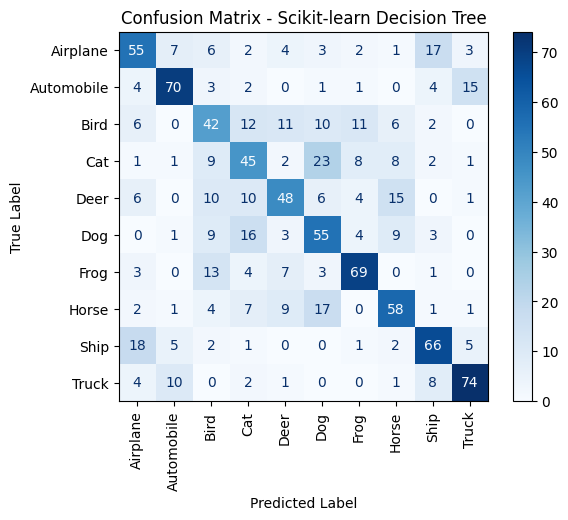

Metric     | Value     
-------------------------
Accuracy   | 0.5820
Precision  | 0.5842
Recall     | 0.5820
F1-Score   | 0.5823


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Load the CIFAR-10 feature vectors and labels
train_features = np.load('train_features_pca.npy')
train_labels = np.load('train_labels.npy')
test_features = np.load('test_features_pca.npy')
test_labels = np.load('test_labels.npy')

# Initialize the Scikit-learn Decision Tree Classifier
dt_sklearn = DecisionTreeClassifier(criterion='gini', max_depth=50, random_state=42)

# Fit the classifier on the training data
dt_sklearn.fit(train_features, train_labels)

# Predict on the test data
predictions_sklearn = dt_sklearn.predict(test_features)

# Calculate accuracy
accuracy_sklearn = accuracy_score(test_labels, predictions_sklearn)
print(f"Scikit-learn Decision Tree Accuracy: {accuracy_sklearn * 100:.2f}%")

# 1. Confusion Matrix Visualization
class_labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]
cm = confusion_matrix(test_labels, predictions_sklearn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')  
plt.title("Confusion Matrix - Scikit-learn Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 2. Metrics Table
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    true_positives = np.diag(cm)
    false_positives = np.sum(cm, axis=0) - true_positives
    false_negatives = np.sum(cm, axis=1) - true_positives
    true_negatives = np.sum(cm) - (false_positives + false_negatives + true_positives)
    
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    f1_score = 2 * (precision * recall) / (precision + recall)
    accuracy = np.sum(true_positives) / np.sum(cm)
    
    return accuracy, precision, recall, f1_score

# Calculate metrics
accuracy, precision, recall, f1_score_value = calculate_metrics(test_labels, predictions_sklearn)

# Print metrics in a table format
print(f"{'Metric':<10} | {'Value':<10}")
print("-" * 25)
print(f"Accuracy   | {accuracy:.4f}")
print(f"Precision  | {np.mean(precision):.4f}")
print(f"Recall     | {np.mean(recall):.4f}")
print(f"F1-Score   | {np.mean(f1_score_value):.4f}")
